In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
import seaborn as sns
import bokeh
%matplotlib inline

In [4]:
df = pd.read_csv('/Users/prashant/Downloads/rent-data.csv')

In [11]:
print(df.shape)
print(df['Metro'].nunique())
print(df.columns)

(6455, 62)
639
Index([u'RegionName', u'State', u'Metro', u'CountyName', u'2010-02',
       u'2010-03', u'2010-04', u'2010-05', u'2010-06', u'2010-07', u'2010-08',
       u'2010-09', u'2010-10', u'2010-11', u'2010-12', u'2011-01', u'2011-02',
       u'2011-03', u'2011-04', u'2011-05', u'2011-06', u'2011-07', u'2011-08',
       u'2011-09', u'2011-10', u'2011-11', u'2011-12', u'2012-01', u'2012-02',
       u'2012-03', u'2012-04', u'2012-05', u'2012-06', u'2012-07', u'2012-08',
       u'2012-09', u'2012-10', u'2012-11', u'2012-12', u'2013-01', u'2013-02',
       u'2013-03', u'2013-04', u'2013-05', u'2013-06', u'2013-07', u'2013-08',
       u'2013-09', u'2013-10', u'2013-11', u'2013-12', u'2014-01', u'2014-02',
       u'2014-03', u'2014-04', u'2014-05', u'2014-06', u'2014-07', u'2014-08',
       u'2014-09', u'2014-10', u'2014-11'],
      dtype='object')


In [19]:
print(df.head())

     RegionName State         Metro    CountyName  2010-02  2010-03  2010-04  \
0      New York    NY      New York        Queens   2200.0   2200.0   2200.0   
1   Los Angeles    CA   Los Angeles   Los Angeles   2275.0   2300.0   2350.0   
2       Chicago    IL       Chicago          Cook   1200.0   1200.0   1200.0   
3       Houston    TX       Houston        Harris   1300.0   1350.0   1350.0   
4  Philadelphia    PA  Philadelphia  Philadelphia   1100.0   1200.0   1300.0   

   2010-05  2010-06  2010-07       ...        2014-04  2014-05  2014-06  \
0   2250.0   2295.0   2300.0       ...         2800.0   2800.0   2900.0   
1   2395.0   2400.0   2395.0       ...         2100.0   2100.0   2140.0   
2   1200.0   1195.0   1200.0       ...         1550.0   1599.0   1645.0   
3   1300.0   1350.0   1300.0       ...         1471.0   1495.0   1500.0   
4   1300.0   1300.0   1350.0       ...         1375.0   1400.0   1400.0   

   2014-07  2014-08  2014-09  2014-10  2014-11  Total Change  Percen

In [17]:
df['Total Change'] = df.loc[:,'2014-11'] - df.loc[:,'2010-02']
df['Percent Change'] = (df.loc[:,'2014-11'] - df.loc[:,'2010-02']) / df.loc[:,'2010-02']

In [20]:
df['Total Change'] = df.loc[:,'2014-11'] - df.loc[:,'2010-02']
df['Percent Change'] = (df.loc[:,'2014-11'] - df.loc[:,'2010-02']) / df.loc[:,'2010-02']
df['Year Change'] = df.loc[:,'2014-01'] - df.loc[:,'2013-01']
df['Year Percent Change'] = (df.loc[:,'2014-01'] - df.loc[:,'2013-01']) / df.loc[:,'2013-01']

In [21]:
print('Mean rent (Feb, 2010): ' + str(df['2010-02'].mean()))
print('Mean rent (Nov, 2014): ' + str(df['2014-11'].mean()))
print('------------------------------------------------------')
print('Mean total change: ' + str(df['Total Change'].mean()))
print('Mean percent change: ' + str(df['Percent Change'].mean()))
print('------------------------------------------------------')
print('Mean 1 year change: ' + str(df['Year Change'].mean()))
print('Mean 1 year percent change: ' + str(df['Year Percent Change'].mean()))

Mean rent (Feb, 2010): 5569.64747356
Mean rent (Nov, 2014): 1597.49868704
------------------------------------------------------
Mean total change: -277.894417476
Mean percent change: 0.356439916418
------------------------------------------------------
Mean 1 year change: 74.9825401295
Mean 1 year percent change: 0.11330829473


In [41]:
def plotr(data, group, column, bins=100):
    plot = df.groupby(group)[column].mean().plot(kind='hist', bins=bins)
    (mu, sigma) = norm.fit(df[column])
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=6)
    
    plt.title('Mean {} Grouped by {}'.format(column, group))
    plt.xlabel(column)
    plt.ylabel('Numer of Occurrences')
    
    mn = df[column].mean()
    plt.axvline(mn, color='r', linestyle='dashed', linewidth=1, label='mean')
    plt.legend()
    return plot

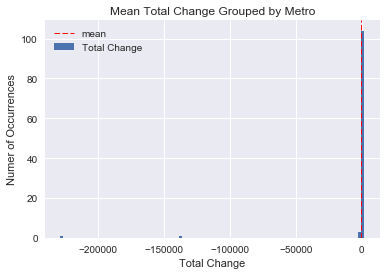

In [42]:
plotr(df, 'Metro', 'Total Change', bins=100)

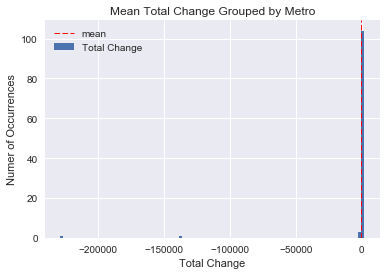

In [33]:
plotr(df, 'Metro', 'Total Change')

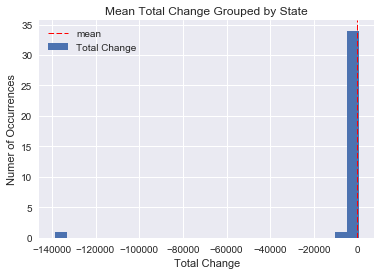

In [34]:
plotr(df, 'State', 'Total Change', bins=25)

In [44]:
print('Minimum total change: ' + str(df['Total Change'].min()))
print(df.loc[df['Total Change'].idxmin(),:].head(5))
print('-------------------------------')
print('Maximum total change: ' + str(df['Total Change'].max()))
print(df.loc[df['Total Change'].idxmax(),:].head(5))

Minimum total change: -228900.0
RegionName     Ocean City
State                  MD
Metro         Ocean Pines
CountyName      Worcester
2010-02            229900
Name: 3877, dtype: object
-------------------------------
Maximum total change: 20000.0
RegionName    East Quogue
State                  NY
Metro            New York
CountyName        Suffolk
2010-02             25000
Name: 5345, dtype: object


In [45]:
print(df.loc[df['2014-11'].idxmax(),:].head(5))
print(df['2014-11'].max())

RegionName    Water Mill
State                 NY
Metro           New York
CountyName       Suffolk
2010-02            49500
Name: 6160, dtype: object
65000.0


In [46]:
print(df.groupby('State')['Total Change'].mean().sort_values(ascending=False).head(5))
print('---------------------------------')
print(df.groupby('State')['Total Change'].mean().sort_values(ascending=True).head(5))

State
MA    602.500000
LA    500.000000
FL    378.525773
NJ    346.200000
WA    293.250000
Name: Total Change, dtype: float64
---------------------------------
State
MN   -138760.000000
MD     -6518.371429
OK      -145.000000
IN      -125.000000
NM       -95.000000
Name: Total Change, dtype: float64


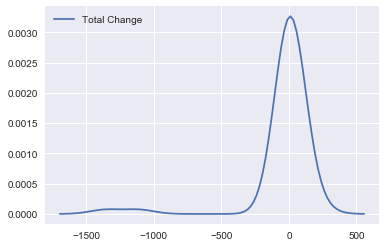

In [51]:
df['Total Change']=df['Total Change'].fillna(0)
j = df.groupby('State', as_index=True)['Total Change'].mean()
plot = sns.kdeplot(j)
plt.show()
plt.clf()

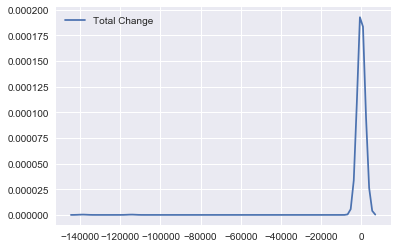

In [49]:
df['Total Change']=df['Total Change'].fillna(0)
kb = df.groupby('Metro')['Total Change'].mean()
plot = sns.kdeplot(kb)
plt.show()
plt.clf()

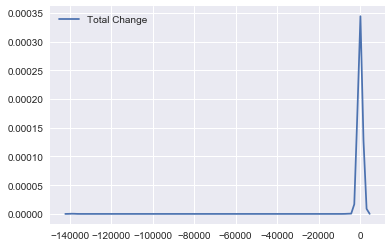

In [50]:
df['Total Change']=df['Total Change'].fillna(0)
kb = df.groupby('CountyName')['Total Change'].mean()
plot = sns.kdeplot(kb)
plt.show()
plt.clf()